### Sentiment Analysis (on twitter data)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import json

In [2]:
## sentiment libraries
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [4]:
import datetime as dt
import time
today = dt.date.today()
yesterdays_date = '{:%m-%d-%Y}'.format(dt.date(today.year, today.month-1, today.day))#'12-10-2017'#
print(yesterdays_date)


02-22-2018


In [34]:
## get data
with open('tweets of trends/{}.txt'.format(yesterdays_date), 'r') as f:
    tweets_d = json.loads(f.read())
with open('trends/{}.txt'.format(yesterdays_date), 'r') as f:
    trends_d = json.loads(f.read())
    sorted_trends = sorted(d, key=d.get, reverse=True)

In [35]:
type(sorted_trends)

list

In [36]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load in 

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the "../input/" directory.
# # For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

# from subprocess import check_output
# print(check_output(["ls", "../input"]).decode("utf8"))

# import json
# date = '10-31-2017'
# with open('../input/October_tweets.txt', 'r') as f:
#     tweets_d = json.loads(f.read())[date]
# with open('../input/October.txt', 'r') as f:
#     trends_d = json.loads(f.read())[date]
#     sorted_trends = sorted(trends_d, key=trends_d.get, reverse=True)
    

# # Any results you write to the current directory are saved as output.

In [37]:
def reorder(dat):
    '''
        given data in the format stored in the file - trend: {tweets: {tweet_text: count}...}
        
        reorder it to a list of the tweets - (tweet_text times the number of times they were originally seen). 
        so sum of original counts should equal len of new list --> 
                            
                            sum(dat[trend][tweets][count]) == len(new_dat[trend][tweets])        
        
        return dictionary of tweets ONLY ex. {trend: {tweets: [list of tweet texts]}}
        
    '''
    new_dat = {}
    for k in dat.keys():
        new_dat[k] = {}
        new_dat[k]['tweets'] = []
        t = [[x]*v for x,v in dat[k]['tweets'].items()]
        for i in t:
            for x in i:
                new_dat[k]['tweets'].append(x)
    return new_dat


In [38]:
new_d = reorder(dat)
# len(new_d['#DACA']['tweets'])
# tweets_d = new_d.copy()

In [39]:
# trump_russia = ' '.join(dat['Trump Tower Moscow']['tweets'])

In [40]:
## sentiment for all trends
temp_all = [tweet_data[k]['tweets'] for k in tweet_data.keys()]
all_tweets = [j for i in temp_all for j in i]

In [42]:
## compound is overall measure of sentiment pos >=0.5, neg<=-0.5, neutral otherwise. 

## store top compound score (abs(compound))
top_compounder = {'x':0}

headers = ['pos', 'neg', 'neu', 'compound']
analyser = SentimentIntensityAnalyzer()
print('+'+'-'*81+'+')
print("|{:^25}        | {:^10}| {:^10}| {:^10}| {:^10}|".format('Trend','positive','negative','neutral','compound'))
print('|'+'-'*81+'|')
tweet_data = reorder(tweets_d)
for k in tweet_data.keys():
    tweets = tweet_data[k]['tweets']
    n = len(tweets)
    pos=compound=neu=neg=0
    for tweet in tweets:
        vs = analyser.polarity_scores(tweet)
        pos+=vs['pos']/n
        compound += vs['compound']/n
        neu += vs['neu']/n
        neg += vs['neg']/n
    if abs(compound) > abs(list(top_compounder.values())[0]):
        del top_compounder[list(top_compounder.keys())[0]]
        top_compounder[k] = compound
    if compound > 0.3:
        print('|{:<25} ({:^4}) | {:^10.5}| {:^10.5}| {:^10.5}| \x1b[6;30;42m{:^10.5}\x1b[0m|'.format(k[:25], n, pos, neg, neu, compound))
    elif compound < -.3:
        print('|{:<25} ({:^4}) | {:^10.5}| {:^10.5}| {:^10.5}| \x1b[3;30;41m{:^10.5}\x1b[0m|'.format(k[:25], n, pos, neg, neu, compound))
    else:
        print('|{:<25} ({:^4}) | {:^10.5}| {:^10.5}| {:^10.5}| {:^10.5}|'.format(k[:25], n, pos, neg, neu, compound))
#     break
print('+'+'-'*81+'+')
# # len(all_tweets)
# n = len(all_tweets)
# pos=compound=neu=neg=0
# for tweet in all_tweets:
#     vs = analyser.polarity_scores(tweet)
#     pos+=vs['pos']/n
#     compound += vs['compound']/n
#     neu += vs['neu']/n
#     neg += vs['neg']/n
# if compound > 0.3:
#     print('|{:<15} ({:^4}) | {:^10.5}| {:^10.5}| {:^10.5}| \x1b[6;30;42m{:^10.5}\x1b[0m|'.format('All Tweets', n, pos, neg, neu, compound))
# elif compound < -.3:
#     print('|{:<15} ({:^4}) | {:^10.5}| {:^10.5}| {:^10.5}| \x1b[3;30;41m{:^10.5}\x1b[0m|'.format('All Tweets', n, pos, neg, neu, compound))
# else:
#     print('|{:<15} ({:^4}) | {:^10.5}| {:^10.5}| {:^10.5}| {:^10.5}|'.format('All Tweets', n, pos, neg, neu, compound))

+---------------------------------------------------------------------------------+
|          Trend                  |  positive |  negative |  neutral  |  compound |
|---------------------------------------------------------------------------------|
|Seahawks                  (600 ) |  0.080655 |  0.099057 |  0.82029  | -0.053055 |
|#ThankYouBTS              (2900) |  0.11028  |  0.036906 |  0.85282  |  0.18335  |
|Ravens                    (400 ) |  0.091985 |  0.055537 |  0.85248  |  0.071068 |
|michael bennett           (200 ) |  0.032845 |  0.11491  |  0.85223  |  -0.25863 |
|Rich Swann                (1773) |  0.21108  |  0.16411  |  0.62479  |  0.059785 |
|Pogba                     (2000) |  0.10761  |  0.061473 |   0.8309  |  0.18499  |
|#skol                     (1200) |   0.128   |  0.063959 |  0.80804  |  0.17479  |
|#SundayMorning            (3078) |  0.090202 |  0.046155 |  0.86365  |  0.093943 |
|#Bills                    (1370) |  0.17224  |  0.07084  |  0.75691  |  0.2

|Doug                      (991 ) |  0.092892 |  0.067936 |  0.83816  |  0.055361 |
|#OutlanderFinale          (600 ) |  0.14627  |  0.022888 |  0.83083  |  0.26237  |
|Derby Day                 (2700) |  0.13309  |  0.043563 |  0.82335  |  0.25183  |
|Rojo                      (2000) |  0.022414 |  0.026619 |  0.95097  | -0.012617 |
|Wenger                    (2500) |  0.07998  |  0.080584 |  0.83945  |  -0.01059 |
|Rod Smith                 (1100) |  0.047118 |  0.023782 |   0.9291  |  0.046193 |
|#WeirdResponsesToILoveYou (2089) |  0.10222  |  0.029507 |  0.86828  |  0.093241 |
|Wentz                     (1164) |  0.096245 |  0.081808 |  0.82197  |  0.013209 |
|Peter Bosz                (3298) |  0.025876 |  0.016773 |  0.95735  |  0.031503 |
|nick foles                (500 ) |  0.098742 |  0.057092 |  0.84416  |  0.084101 |
|#CapcomCup2017            (3400) |  0.12842  |  0.030696 |  0.84089  |  0.21624  |
|Southampton               (3297) |  0.082085 |  0.045084 |  0.87282  |  0.0

In [43]:
top_compounder

{'walking dead': -0.5602850000000003}

In [44]:
len(tweets)

1386

In [45]:
# trend = np.random.choice(list(dat.keys()))
trend = list(top_compounder.keys())[0]

In [46]:
trend

'walking dead'

In [47]:
len(new_d[trend]['tweets']) ### hmmm

100

## Summarizing

In [48]:
print(len(set(tweet_data[trend]['tweets'])))
trending_tweets = set(tweet_data[trend]['tweets'])

94


In [49]:
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import pprint
pp = pprint.PrettyPrinter(indent=4)

In [50]:
sum_sentences = []
candidate_tweets = {}
candidate_tweets_counts = {}
words = word_tokenize(''.join(trending_tweets))
stoppers = stopwords.words('english')+['RT', 'rt', 'https']
cleaned_words = [word.lower() for word in words
                 if (word.lower() not in stoppers and word.isalpha())]

In [51]:
word_freq = FreqDist(cleaned_words)
most_freq_words = word_freq.most_common(50)
pp.pprint(most_freq_words)

[   ('walking', 83),
    ('dead', 79),
    ('de', 15),
    ('carl', 14),
    ('que', 14),
    ('thewalkingdead', 10),
    ('finale', 9),
    ('é', 8),
    ('got', 7),
    ('e', 7),
    ('se', 6),
    ('tonight', 6),
    ('ever', 5),
    ('eu', 5),
    ('like', 5),
    ('midseason', 4),
    ('lincoln', 4),
    ('um', 4),
    ('pra', 4),
    ('watching', 4),
    ('série', 4),
    ('la', 4),
    ('não', 4),
    ('como', 4),
    ('andrew', 4),
    ('em', 3),
    ('watch', 3),
    ('episode', 3),
    ('con', 3),
    ('season', 3),
    ('fandom', 3),
    ('una', 3),
    ('viu', 3),
    ('death', 3),
    ('fucked', 3),
    ('grimes', 3),
    ('ainda', 3),
    ('bit', 3),
    ('spoiler', 3),
    ('really', 3),
    ('way', 3),
    ('personagem', 3),
    ('episódio', 3),
    ('comicbooknow', 3),
    ('mas', 3),
    ('showrunner', 3),
    ('ta', 3),
    ('último', 2),
    ('sad', 2),
    ('worst', 2)]


In [52]:
for tweet in set(trending_tweets):
    candidate_tweets[tweet] = tweet.lower()
# candidate_sentences['RT @_Makada_: North Korea just fired a missile over Japan. You can thank @BillClinton for basically giving nukes to this communist dictator…']

In [53]:
for long, short in candidate_tweets.items():
    count = 0
    for freq_word, freq_score in most_freq_words:
        if freq_word in short:
            count += freq_score
    candidate_tweets_counts[long] = count

In [54]:
candidate_tweets_counts

{'"Let\'s Talk About Tonight\'s Walking Dead Finale, Shall we?" https://t.co/q9VE6GRRfx': 202,
 "'Walking Dead' Star Andrew Lincoln:  #Buzz #Entertainment #NEWS #news https://t.co/c8ph6nlbtq": 195,
 '@AMCTalkingDead BOYCOTT THE WALKING DEAD TILL THEY KEEP CARL': 201,
 '@ThatKevinSmith will we see Jay &amp; Bob on The Walking Dead someday ?': 190,
 '@aaron_memeking The walking dead stopped being good a long time ago': 187,
 '@cenastwdbrasil Ridículo, série acabou pra mim. Sério. 90% enrolação, 10% coisas interessantes. Provavelmente a sér… https://t.co/Gja7qrF4fT': 27,
 '@imsummerhinton @Parisandrsonn The walking dead': 188,
 '@melissapletier Siiim! Tem muitas coisas nos quadrinhos que acontecem com o Carl e que ainda não aconteceu na série… https://t.co/RPGUm17DbT': 72,
 '@talkingdead If you don’t tell Scott Gimple that he has jumped the shark on live tv then you are part of the problem with the walking dead.': 194,
 '@thgcabral desde quando the walking dead é modinha?': 192,
 'Amo the

In [55]:
from collections import OrderedDict
sorted_tweets = OrderedDict(sorted(candidate_tweets_counts.items(),
                                  key=lambda x: x[1],
                                  reverse=True)[:10])#top 10
print('\n\n'.join(set(sorted_tweets.keys())))

RT @pqpglenn: mortes acontecem em the walking dead e muitos dizem que a gente devia se acostumar mas, nós nunca iremos, até pq nós amamos n…

RT @prizejeon: to de luto,
mas não é pelo carl grimes

eu to de luto por você the walking dead

matou o personagem que mais evoluiu e o que…

NÃO É MATANDO PERSONAGEM QUE SE FAZ UMA BOA TEMPORADA OH PORRA acorda the walking dead para de focar em 3 episódios… https://t.co/KDh3W16gNB

It’s happening…#TheWalkingDead Mid-Season Finale airs TONIGHT. Get ever more hyped by watching the trailer:… https://t.co/tYM6WoOryM

Amo the walking dead, mas não gostei desse último episódio, e ter que ficar esperando pra ver o Carl morrer em fevereiro

RT @TWDBeth_: Chandler Riggs grew up on The Walking Dead &amp; very dearly played Carl in a way I don't think anyone else could ever do like he…

RT @TalkOfTheDead: Carl Grimes got bit.
The Walking Dead won't return until 2018.
Tomorrow's Monday.

THIS HAS BEEN THE WORST DAY EVER #The…

SÉRIO GENTE AMO THE WALKING DE

In [56]:
sorted_tweets.values()

odict_values([242, 241, 232, 230, 227, 226, 225, 224, 221, 221])

In [57]:
most_freq_words

[('walking', 83),
 ('dead', 79),
 ('de', 15),
 ('carl', 14),
 ('que', 14),
 ('thewalkingdead', 10),
 ('finale', 9),
 ('é', 8),
 ('got', 7),
 ('e', 7),
 ('se', 6),
 ('tonight', 6),
 ('ever', 5),
 ('eu', 5),
 ('like', 5),
 ('midseason', 4),
 ('lincoln', 4),
 ('um', 4),
 ('pra', 4),
 ('watching', 4),
 ('série', 4),
 ('la', 4),
 ('não', 4),
 ('como', 4),
 ('andrew', 4),
 ('em', 3),
 ('watch', 3),
 ('episode', 3),
 ('con', 3),
 ('season', 3),
 ('fandom', 3),
 ('una', 3),
 ('viu', 3),
 ('death', 3),
 ('fucked', 3),
 ('grimes', 3),
 ('ainda', 3),
 ('bit', 3),
 ('spoiler', 3),
 ('really', 3),
 ('way', 3),
 ('personagem', 3),
 ('episódio', 3),
 ('comicbooknow', 3),
 ('mas', 3),
 ('showrunner', 3),
 ('ta', 3),
 ('último', 2),
 ('sad', 2),
 ('worst', 2)]

### Summarization with Gensim

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
from nltk.corpus import stopwords, PlaintextCorpusReader
# from nltk.book import *

In [59]:
import re
tweets_data = ''.join(set(tweet_data[trend]['tweets']))
tweets_data = re.sub('http\S+', '', tweets_data).replace('  ', ' ')
tweets_data = re.sub('@\S+', '.', tweets_data).replace(' . ', '. ')
tweets_data = tweets_data.replace('RT', '')
tweets_data = tweets_data.replace('\n', '')

print(tweets_data[:5000])

The walking dead was so sad tonight this show really gets to you. Overkill's The Walking Dead looks unreal. A four player co-op FPS set in post-apocalyptic Washington D.C. 😍💀 pobres vemos mañana the walking dead, por favor no hacer comentarios respecto al capítulo. Gracias.I dont even watch walking dead anymore so Carl's death dosen't phase me"Let's Talk About Tonight's Walking Dead Finale, Shall we?". was not expecting this since i have read each and every walking dead comic and this is NOT how it pans out #TheWalkingD…Le hice una joda con the walking dead y casi se cumple,mundo tragameNÃO É MATANDO PERSONAGEM QUE SE FAZ UMA BOA TEMPORADA OH PORRA acorda the walking dead para de focar em 3 episódios… SHIT WHO ELSE WAS WATCHING THE WALKING DEAD! CORALLLLLLLLL #TheWalkingDead‘Walking Dead’ Boss Cements Iconic Character’s Fate: “That Is a One-Way Ticket”Showrunner Scott M. Gimple confirm…. Este capítulo de The Walking Dead me acaba de causar una crisis existencial y una depresión infinit

In [60]:
import gensim.summarization

C:\Users\rsloo\Miniconda3\envs\py35\lib\site-packages\gensim\utils.py:865: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [61]:
summary = gensim.summarization.summarize(tweets_data, word_count=100)

In [62]:
print(summary)

O QUE MAIS ME IMPRESSIONOU NESSE EPISÓDIO DE THE WALKING DEADé as pessoas ainda assistirem essa merda‘Walking Dead’ Star Andrew Lincoln: “This Is the Biggest Death We’ve Ever Had”The zombie drama leading man talks… THEY REALLY KILL OFF CARL IN THE WALKING DEAD?
#TheWalkingDead the walking dead, mas não gostei desse último episódio, e ter que ficar esperando pra ver o Carl morrer em fevereiroThe walking dead got me fucked upSÉRIO GENTE AMO THE WALKING DEAD MINHA SÉRIE PREFERIDA (E OLHA QUE ASSISTO SÉRIE P CARALHO, COMO SE NÃO TIVESSE NAD… walking dead just made me mad how it ended now got to wait till February😬🤔Walking Dead Mid-Season 8 Finale: When Is The Show Back?


In [63]:
# print(gensim.summarization.keywords(tweets_data))
def clean_tweets(tweets):
    import re
    tweets = set(tweets)
#     tweets = list(tweets.keys())
    tweet_str = ''.join(tweets)
    tweet_str = re.sub('http\S+', '', tweet_str).replace('  ', ' ') #removing urls
    tweet_str = re.sub('\S+.com?\S+', '', tweet_str)
    tweet_str = re.sub('@\S+', '.', tweet_str).replace(' . ', '. ') #removing mentions @
    tweet_str = re.sub('&\S+;', '', tweet_str).replace('  ',' ')#, tweet_str) #formatting
    tweet_str = tweet_str.replace('RT', ' ') #removing RT
    tweet_str = tweet_str.replace('\n\n', '')
    tweet_str = '.'.join(list(set(tweet_str.split('.'))))
#     print(tweet)
    
    return tweet_str.replace('  ',' ')

In [64]:
def get_summary(tweets, length_of_sum=100):
    import gensim.summarization
    return gensim.summarization.summarize(clean_tweets(tweets),
                                          word_count=length_of_sum)

In [65]:
# print(get_summary(dat['Justin Verlander']['tweets'], 50))

In [66]:
for trend in sorted_trends[:10]:
    print(trend)
    print()
    if trend in tweet_data:
        print(get_summary(tweet_data[trend]['tweets'], 50))
    print()

#WingsTourFinalDay3

#WingsTourFinalDay3 WAVE IS MORE BEAUTIFUL TODAY HAHAHA WITH NEW TECHNIQUE BY YOONGI HAHA #WingsTourFinalDay3171210 BTS JUNGKOOK - Wings Tour Final Day 3
wings tour acabando e toma aqui do hoseok quebrando na dança em baepsae#WingsTourFinalDay3 you, thank you so much Bangtan for this amazing chapter in BTS and ARMY's story.
#taehyung #jimin #hoseok #jungkook #namjoon #yoongi #jin #bts #army #WingsTourFinalDay3 #Wi…FUCK RAPLINE #WingsTourFinalDay3I love.

Doug

Know your voter rights #Alabama ‼️You can vote for Doug Jones even if you voted in the Republican primary or usually vot… ." #DigDoug #TW Doug run the fucking football.
Here you are folks: Either Roy Moore or Doug Jones will be your Senator elect this Tuesday!⚠️⚠️⚠️⚠️🐒🐒🐒🐒 your voter rights, Alabama.

Browns

4. Browns fans: "There is no way we can lose this game" Kizer: "hold my beer" 😂😂 Your daily reminder that Josh Gordon lost his livelihood for 3 years over weed, a drug that will be legalized in all 50 

C

## Topic Modeling
#### Using LDA: Latent Dirichlet Allocation models

In [67]:
from gensim import corpora
from gensim.models.ldamulticore import LdaMulticore
# from gensim.models.ldamodel import LdaModel
from gensim.parsing.preprocessing import STOPWORDS
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
import pprint

In [68]:
list(STOPWORDS.copy())
trends = np.random.choice(list(tweet_data.keys()), size=3, replace=False)

In [69]:
tweets = sent_tokenize(clean_tweets(tweet_data[trends[0]]['tweets'][:1000])+\
            clean_tweets(tweet_data[trends[1]]['tweets'][:1000])+\
            clean_tweets(tweet_data[trends[2]]['tweets'][:1000]))
STOPWORDS_ = set(list(STOPWORDS)+stopwords.words('spanish')+stopwords.words('english'))
texts1time = [[word for word in tweet.lower().split()
        if word not in STOPWORDS_ and word.isalnum()]
        for tweet in tweets]

In [70]:
len(texts1time)
# print(texts)

1121

In [71]:
dictionary = corpora.Dictionary(texts1time)
corpus = [dictionary.doc2bow(text) for text in texts1time]

In [72]:
print(corpus[9])
print(texts1time[9])
print(dictionary[73])

[(3, 1), (48, 1)]
['delph', 'fault']
beard


In [73]:
num_topics = 3
passes=10
lda = LdaMulticore(corpus,
                   id2word=dictionary,
                   num_topics=num_topics,
                   passes=passes,
                   workers=3)

In [74]:
print(trends)

['Delph' 'Lovren' '#PeekABoo1stwin']


In [75]:
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(lda.print_topics(num_words=10))

[   (   0,
        '0.061*"lovren" + 0.013*"dejan" + 0.011*"penalty" + 0.009*"delph" + '
        '0.008*"blame" + 0.007*"lukaku" + 0.007*"soft" + 0.006*"ref" + '
        '0.006*"lewin" + 0.006*"red"'),
    (   1,
        '0.036*"lovren" + 0.012*"delph" + 0.010*"like" + 0.010*"liverpool" + '
        '0.007*"look" + 0.007*"good" + 0.007*"dejan" + 0.006*"think" + '
        '0.006*"people" + 0.006*"player"'),
    (   2,
        '0.047*"lovren" + 0.024*"delph" + 0.005*"klopp" + 0.005*"pep" + '
        '0.004*"fuck" + 0.004*"fabian" + 0.004*"think" + 0.004*"2" + '
        '0.004*"city" + 0.004*"play"')]


In [76]:
from operator import itemgetter
lda.get_document_topics(corpus[33],minimum_probability=0.05,per_word_topics=False)
sorted(lda.get_document_topics(corpus[33],minimum_probability=0,per_word_topics=False),key=itemgetter(1),reverse=True)

[(1, 0.85425100497856143),
 (0, 0.077501867192070278),
 (2, 0.068247127829368273)]

In [77]:
print(texts1time[33])

['player', 'ederson', 'walker', 'kompany']


In [78]:
def draw_wordcloud(lda,topicnum,min_size=0,STOPWORDS=[]):
    from nltk.corpus import stopwords
    STOPWORDS += stopwords.words('spanish')
    word_list=[]
    prob_total = 0
    for word,prob in lda.show_topic(topicnum,topn=50):
        prob_total +=prob
    for word,prob in lda.show_topic(topicnum,topn=50):
        if word in STOPWORDS or  len(word) < min_size:
            continue
        freq = int(prob/prob_total*1000)
        alist=[word]
        word_list.extend(alist*freq)

    from wordcloud import WordCloud, STOPWORDS
    import matplotlib.pyplot as plt
    %matplotlib inline
    text = ' '.join(word_list)
    wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white',width=3000,height=3000).generate(' '.join(word_list))


    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

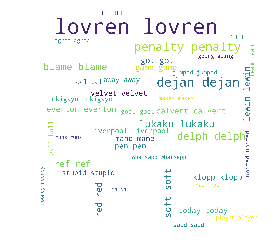

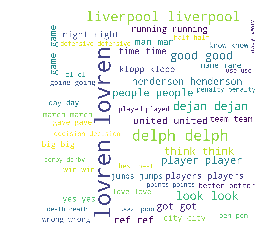

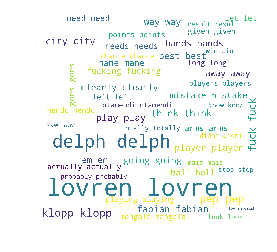

In [79]:
for i in range(3):
    draw_wordcloud(lda,i)

In [80]:
len(corpus)

1121

## All tweets; similarities

In [81]:
tweets = [clean_tweets(list(set(tweet_data[k]['tweets']))) for k in dat.keys()]
texts = [[word for word in tweet.lower().split()
        if word not in STOPWORDS_ and word.isalnum()]
        for tweet in tweets]

dictionary_by_trend = corpora.Dictionary(texts)
text_list = []
for i in range(len(tweets)):
    doc = []
    for word in texts[i]:
        if word in STOPWORDS_ or not word.isalpha() or len(word)<5:
            continue
        doc.append(word)
    text_list.append(doc)
by_trend_corpus = [dictionary_by_trend.doc2bow(text) for text in text_list]

In [82]:
# print(len(tweets[0]))
len(by_trend_corpus)

171

In [83]:
lda_by_trend = LdaMulticore(by_trend_corpus,
                           id2word=dictionary_by_trend,
                           num_topics=20,
                           passes=10,
                           workers=3)

In [84]:
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(lda_by_trend.print_topics(num_words = 10))

[   (   0,
        '0.018*"kizer" + 0.014*"premiere" + 0.011*"metro" + 0.009*"album" + '
        '0.007*"world" + 0.006*"boomin" + 0.005*"video" + 0.005*"deshone" + '
        '0.005*"movie" + 0.004*"people"'),
    (   1,
        '0.062*"baker" + 0.056*"mayfield" + 0.050*"heisman" + 0.049*"spring" + '
        '0.018*"trophy" + 0.008*"winner" + 0.007*"oklahoma" + 0.007*"jimin" + '
        '0.007*"winning" + 0.004*"player"'),
    (   2,
        '0.036*"wenger" + 0.023*"rooney" + 0.019*"pogba" + 0.013*"sanchez" + '
        '0.008*"sánchez" + 0.007*"ederson" + 0.006*"arsene" + 0.006*"wayne" + '
        '0.004*"arsenal" + 0.004*"united"'),
    (   3,
        '0.020*"packers" + 0.011*"negan" + 0.009*"daryl" + 0.008*"browns" + '
        '0.006*"maggie" + 0.005*"wings" + 0.005*"rodgers" + 0.004*"thank" + '
        '0.004*"aaron" + 0.003*"crying"'),
    (   4,
        '0.054*"david" + 0.045*"silva" + 0.016*"manchester" + 0.011*"united" + '
        '0.006*"otamendi" + 0.005*"derby" + 0.004*"premi

In [85]:
from operator import itemgetter
sorted(lda_by_trend.get_document_topics(by_trend_corpus[1],minimum_probability=0,per_word_topics=False),key=itemgetter(1),reverse=True)

[(11, 0.99841144633675438),
 (3, 0.00090930837137539263),
 (1, 3.7735850325451325e-05),
 (19, 3.7735849830565474e-05),
 (0, 3.7735849761143542e-05),
 (5, 3.7735849661572677e-05),
 (10, 3.7735849657603603e-05),
 (9, 3.773584960634657e-05),
 (17, 3.7735849581717792e-05),
 (14, 3.7735849572405512e-05),
 (8, 3.7735849531372194e-05),
 (7, 3.7735849507626872e-05),
 (16, 3.7735849502804164e-05),
 (6, 3.7735849491178915e-05),
 (13, 3.7735849463745253e-05),
 (2, 3.7735849350459692e-05),
 (18, 3.7735849344009346e-05),
 (15, 3.7735849302860106e-05),
 (4, 3.7735849189838176e-05),
 (12, 3.7735849189782495e-05)]

In [ ]:
text_list[1]

['fandom',
 'aunque',
 'ninguno',
 'pueda',
 'videos',
 'siento',
 'sanırım',
 'bugün',
 'bring',
 'excitement',
 'attend',
 'february',
 'december',
 'belki',
 'biasımın',
 'hardships',
 'gente',
 'afortunados',
 'seviyorum',
 'mutluluguna',
 'ningún',
 'concierto',
 'verlos',
 'vlive',
 'dinero',
 'quita',
 'nostalgia',
 'fanchants',
 'heard',
 'watching',
 'living',
 'migrating',
 'canada',
 'mother',
 'terbang',
 'lebih',
 'tinggi',
 'bersama',
 'orgullo',
 'líder',
 'simplemente',
 'pongo',
 'aplaudo',
 'hombre',
 'merece',
 'months',
 'realize',
 'works',
 'wanted',
 'write',
 'truth',
 'inspiration',
 'father',
 'seven',
 'amazing',
 'leader',
 'wings',
 'start',
 'boyfriend',
 'material',
 'understand',
 'hashtag',
 'beautiful',
 'watching',
 'challenge',
 'noticed',
 'members',
 'forget',
 'impact',
 'thank',
 'letting',
 'desert',
 'rising',
 'detractors',
 'hello',
 'trying',
 'friend',
 'christmas',
 'present',
 'astro',
 'namjoon',
 'supporting',
 'jhope',
 'boyfriend',
 '

In [ ]:
draw_wordcloud(lda_by_trend, 1)

In [ ]:
print(lda_by_trend.show_topic(1, topn=5))
print(lda_by_trend.show_topic(7, topn=5))

In [ ]:
from gensim.similarities.docsim import Similarity
from gensim import corpora, models, similarities
lsi = models.LsiModel(corpus, id2word=dictionary, num_topics=2)
doc = """
The US Open has been a real doozy. Federer has been on the ropes and Nadal was alomst take out as well. New york is in for a good tournement. Marin cilic is looking like the most comfortable player out here.
"""
vec_bow = dictionary.doc2bow(doc.lower().split())
vec_lsi = lsi[vec_bow]
index = similarities.MatrixSimilarity(lsi[corpus])
sims = index[vec_lsi]
sims = sorted(enumerate(sims), key=lambda item: -item[1])


In [60]:
sims

[(252, 0.99999893),
 (927, 0.99999839),
 (383, 0.9999963),
 (595, 0.99999624),
 (644, 0.99997497),
 (531, 0.99996167),
 (821, 0.99994683),
 (602, 0.99990422),
 (846, 0.99988365),
 (937, 0.99980754),
 (184, 0.99977529),
 (816, 0.99970162),
 (907, 0.9996413),
 (699, 0.99953222),
 (873, 0.99952447),
 (736, 0.99952245),
 (201, 0.99940073),
 (694, 0.99913692),
 (789, 0.99911553),
 (603, 0.99908483),
 (416, 0.99899721),
 (19, 0.99899596),
 (814, 0.99899411),
 (592, 0.99893105),
 (781, 0.99880874),
 (508, 0.99872231),
 (651, 0.99866712),
 (759, 0.99866158),
 (623, 0.9985348),
 (932, 0.99843597),
 (563, 0.99813986),
 (335, 0.99808007),
 (739, 0.99793386),
 (800, 0.9976393),
 (123, 0.99745482),
 (133, 0.99739772),
 (771, 0.99726486),
 (774, 0.99726069),
 (540, 0.99662882),
 (571, 0.99662882),
 (802, 0.99621093),
 (785, 0.99577928),
 (909, 0.99522495),
 (467, 0.99518532),
 (876, 0.99466491),
 (219, 0.99440247),
 (763, 0.99432713),
 (240, 0.99347252),
 (33, 0.99339962),
 (911, 0.99338579),
 (16, 

In [61]:
# print(corpus[507])
# print(dictionary[170])
texts1time[sims[0][0]]

['kill',
 'fiancée',
 'gonna',
 'suing',
 'like',
 'subtle',
 'foreshadowing',
 'gets',
 'single',
 'week',
 'good']

In [64]:
# with open('./tweets of trends/10-05-2017.txt', 'r+') as f:
#     d = json.loads(f.read())
#     k = list(d.keys())[0]
#     print(k,json.dumps(d[k], indent=2))

In [65]:
# d[k]['hashtags']